{'orgin': 41, 'not-orgin': 9}
{'Exp': 7, 'T18': 2, 'GR': 1, 'Shtb': 2, 'Raj': 2, 'SF': 28, 'Drnt': 1, 'JShtb': 1, 'DD': 1, 'ACSF': 3, 'Hms': 2}
{'SR': 23, 'NR': 1, 'SER': 2, 'NWR': 1, 'ECR': 5, 'ECoR': 3, 'NFR': 2, 'SWR': 8, 'CR': 2, 'SCR': 1, 'SECR': 1, 'WR': 1}


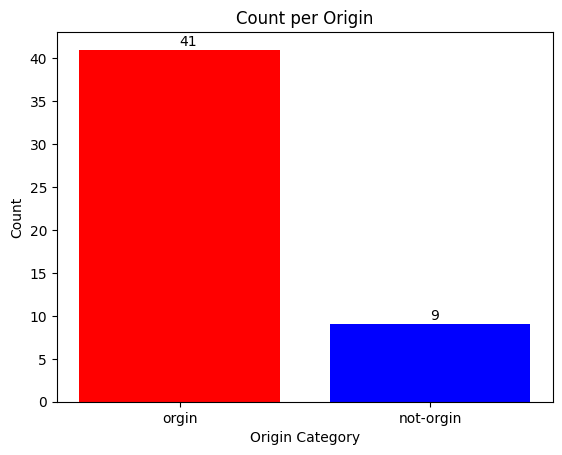

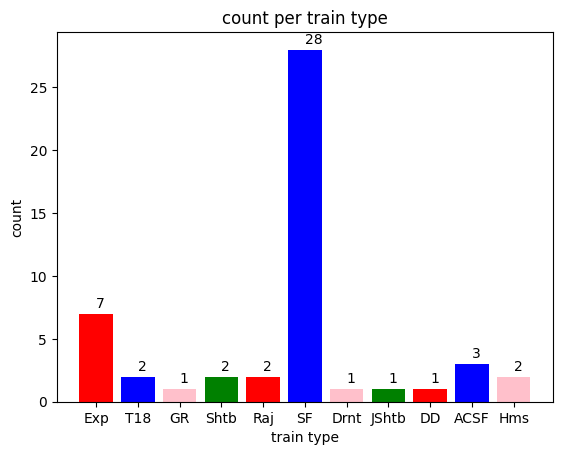

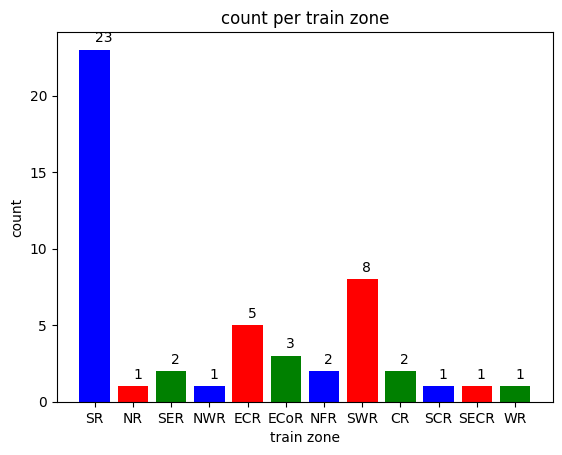

In [25]:
import requests
import html5lib
from bs4 import BeautifulSoup

url = "https://indiarailinfo.com/departures/35?bedroll=undefined&"

dt = requests.get(url)
#print(dt.content)

bs = BeautifulSoup(dt.content, 'html5lib')
bs_data = bs.find("div", attrs={"class":"srhres newbg inline alt"})
#print(bs_data)

orgin_dct = {"orgin":0 , "not-orgin":0}
train_type = {}
train_zone = {}

for dv in bs_data.findAll("div", attrs={"style":"line-height:20px;"}):
    count = 0
    lst_v = []
    for int_dv in dv:
        count += 1
        lst_v.append(int_dv.text)
        if count == 4:
            break
# print(int_dv.text)
    if "*" in lst_v[0]:
        orgin_dct["orgin"] += 1
    else:
        orgin_dct["not-orgin"] += 1
        
    if lst_v[2] not in train_type:
        train_type[lst_v[2]] = 1
    else:
        train_type[lst_v[2]] +=1
        
        
    if lst_v[3] not in train_zone:
        train_zone[lst_v[3]] = 1
    else:
        train_zone[lst_v[3]] += 1
        
print(orgin_dct)
print(train_type)
print(train_zone)

import matplotlib.pyplot as plt

plt.bar(orgin_dct.keys(),orgin_dct.values(), color=["red","blue"])
plt.title("Count per Origin")
plt.xlabel("Origin Category")
plt.ylabel("Count")
for i,j in zip(list(orgin_dct.keys()),list(orgin_dct.values())):
    plt.text(i,j+0.5,j)
plt.show()
    

plt.bar(train_type.keys(),train_type.values(), color=["red","blue","pink","green"])
plt.title("count per train type")
plt.xlabel("train type")
plt.ylabel("count")
for i,j in zip(list(train_type.keys()),list(train_type.values())):
    plt.text(i,j+0.5,j)
plt.show()


plt.bar(train_zone.keys(),train_zone.values(), color=["blue","red","green"])
plt.title("count per train zone")
plt.xlabel("train zone")
plt.ylabel("count")
for i,j in zip(list(train_zone.keys()),list(train_zone.values())):
    plt.text(i,j+0.5,j)
plt.show()
